# Notebook de Jupyter para el dataset Iris

En este Notebook se van a procesar los datos provinientes del dataset Iris para, más adelante, realizar la clasificación

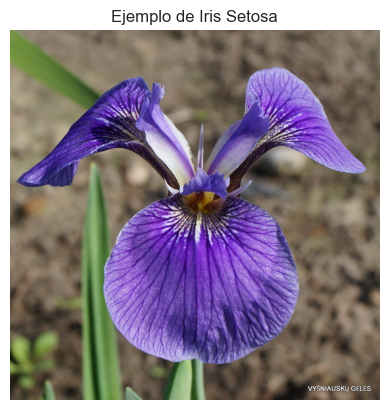

Medidas del ejemplo mostrado:
Largo sépalo: 5.1
Ancho sépalo: 3.5
Largo pétalo: 1.4
Ancho pétalo: 0.2

🌸 Predicción del modelo (Regresión Logística): setosa

📊 PRECISIÓN DE CADA MODELO
Regresión Logística:  1.000
KNN:                  1.000
Árbol de Decisión:    1.000
SVM:                  1.000

Tabla comparativa:



,Modelo,Precisión
0,Logistic Regression,1.0
1,KNN,1.0
2,Decision Tree,1.0
3,SVM,1.0


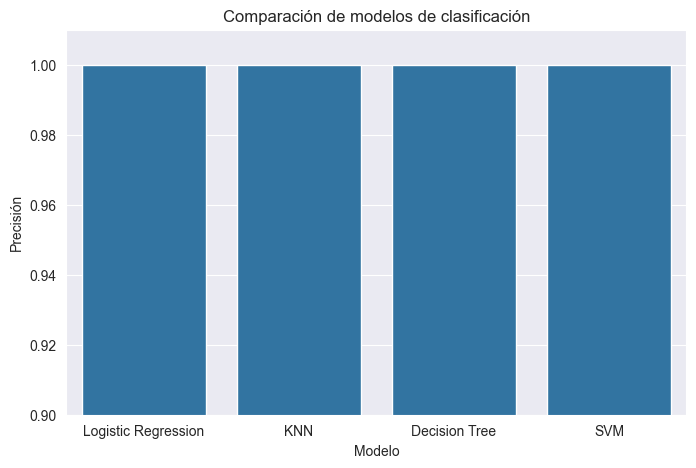

FloatSlider(value=5.0, description='Largo Sépalo', max=8.0, min=4.0)

FloatSlider(value=3.0, description='Ancho Sépalo', max=5.0, min=2.0)

FloatSlider(value=1.5, description='Largo Pétalo', max=7.0, min=1.0)

FloatSlider(value=0.2, description='Ancho Pétalo', max=2.5, min=0.1)

Output()

In [7]:
# =========================================================
# 1. IMPORTS
# =========================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

from IPython.display import display

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# =========================================================
# 2. CARGA DEL DATASET IRIS
# =========================================================
iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df["species"] = y

# División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# =========================================================
# 3. ENTRENAMIENTO DE MODELOS
# =========================================================

# Modelo base: Regresión Logística
model_log = LogisticRegression(max_iter=200)
model_log.fit(X_train, y_train)

# K-Nearest Neighbors
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

# Árbol de decisión
model_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
model_tree.fit(X_train, y_train)

# SVM
model_svm = SVC(kernel='rbf')
model_svm.fit(X_train, y_train)


# =========================================================
# 4. PREDICCIÓN UTILIZANDO UN EJEMPLO + IMAGEN
# =========================================================

# Mostrar una imagen ilustrativa
img = plt.imread('../images/Iris-setosa.jpg')
plt.imshow(img)
plt.axis('off')
plt.title("Ejemplo de Iris Setosa")
plt.show()

# Usamos la primera flor del dataset como ejemplo
ejemplo = X[0]

print("Medidas del ejemplo mostrado:")
print(f"Largo sépalo: {ejemplo[0]}")
print(f"Ancho sépalo: {ejemplo[1]}")
print(f"Largo pétalo: {ejemplo[2]}")
print(f"Ancho pétalo: {ejemplo[3]}")

pred_ejemplo = model_log.predict([ejemplo])[0]
print("\n🌸 Predicción del modelo (Regresión Logística):",
      iris.target_names[pred_ejemplo])


# =========================================================
# 5. CALCULAR PRECISIONES DE TODOS LOS MODELOS
# =========================================================
pred_log = model_log.predict(X_test)
acc_log = accuracy_score(y_test, pred_log)

pred_knn = model_knn.predict(X_test)
acc_knn = accuracy_score(y_test, pred_knn)

pred_tree = model_tree.predict(X_test)
acc_tree = accuracy_score(y_test, pred_tree)

pred_svm = model_svm.predict(X_test)
acc_svm = accuracy_score(y_test, pred_svm)

print("\n==============================================")
print("📊 PRECISIÓN DE CADA MODELO")
print("==============================================")
print(f"Regresión Logística:  {acc_log:.3f}")
print(f"KNN:                  {acc_knn:.3f}")
print(f"Árbol de Decisión:    {acc_tree:.3f}")
print(f"SVM:                  {acc_svm:.3f}")


# =========================================================
# 6. TABLA COMPARATIVA + GRÁFICO
# =========================================================
resultados = pd.DataFrame({
    "Modelo": ["Logistic Regression", "KNN", "Decision Tree", "SVM"],
    "Precisión": [acc_log, acc_knn, acc_tree, acc_svm]
})

print("\nTabla comparativa:\n")
display(resultados)

plt.figure(figsize=(8, 5))
sns.barplot(data=resultados, x="Modelo", y="Precisión")
plt.ylim(0.9, 1.01)
plt.title("Comparación de modelos de clasificación")
plt.show()


# =========================================================
# 7. WIDGETS INTERACTIVOS PARA PROBAR EL MODELO
# =========================================================

# Sliders
sepal_length = widgets.FloatSlider(value=5.0, min=4.0, max=8.0, step=0.1,
                                   description='Largo Sépalo')
sepal_width = widgets.FloatSlider(value=3.0, min=2.0, max=5.0, step=0.1,
                                  description='Ancho Sépalo')
petal_length = widgets.FloatSlider(value=1.5, min=1.0, max=7.0, step=0.1,
                                   description='Largo Pétalo')
petal_width = widgets.FloatSlider(value=0.2, min=0.1, max=2.5, step=0.1,
                                  description='Ancho Pétalo')

output = widgets.Output()

# Función de actualización
def actualizar_prediccion(change=None):
    with output:
        output.clear_output()
        valores = [
            sepal_length.value,
            sepal_width.value,
            petal_length.value,
            petal_width.value,
        ]

        pred = model_log.predict([valores])[0]
        especie = iris.target_names[pred]

        print("Medidas introducidas:", valores)
        print("🌸 Predicción:", especie)

# Activar eventos
for slider in [sepal_length, sepal_width, petal_length, petal_width]:
    slider.observe(actualizar_prediccion, names='value')

# Mostrar UI
display(sepal_length, sepal_width, petal_length, petal_width, output)

# Llamada inicial
actualizar_prediccion()
